In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [114]:
#Load data:
prices_day_1 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\prices_round_4_day_1.csv",sep =";")
prices_day_2 =pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\prices_round_4_day_2.csv",sep =";")
prices_day_3 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\prices_round_4_day_3.csv",sep =";")
prices_day_1["day"] = 1
prices_day_2["day"] = 2
prices_day_3["day"] = 0
prices = pd.concat([prices_day_1, prices_day_2, prices_day_3], ignore_index=True)
prices.sort_values(by=["day","timestamp"],inplace=True)
prices.reset_index(drop=True, inplace=True)
prices = prices[prices["product"] == "MAGNIFICENT_MACARONS"]

In [115]:
prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
6,0,0,MAGNIFICENT_MACARONS,667.0,14.0,665.0,14.0,658.0,25.0,676,7,685.0,25.0,692.0,14.0,671.5,0.0
20,0,100,MAGNIFICENT_MACARONS,668.0,16.0,666.0,10.0,659.0,28.0,677,8,686.0,28.0,693.0,10.0,672.5,0.0
42,0,200,MAGNIFICENT_MACARONS,665.0,14.0,662.0,14.0,656.0,20.0,674,7,683.0,20.0,689.0,14.0,669.5,0.0
52,0,300,MAGNIFICENT_MACARONS,665.0,16.0,662.0,19.0,656.0,20.0,674,8,683.0,20.0,689.0,19.0,669.5,0.0
60,0,400,MAGNIFICENT_MACARONS,664.0,18.0,662.0,19.0,655.0,30.0,673,9,682.0,30.0,689.0,19.0,668.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449930,2,999500,MAGNIFICENT_MACARONS,672.0,10.0,669.0,20.0,663.0,28.0,681,5,690.0,28.0,696.0,20.0,676.5,0.0
449943,2,999600,MAGNIFICENT_MACARONS,667.0,10.0,664.0,14.0,658.0,30.0,676,5,685.0,30.0,691.0,14.0,671.5,0.0
449965,2,999700,MAGNIFICENT_MACARONS,667.0,20.0,664.0,13.0,657.0,28.0,675,10,685.0,28.0,691.0,13.0,671.0,0.0
449973,2,999800,MAGNIFICENT_MACARONS,665.0,18.0,662.0,18.0,656.0,27.0,674,9,683.0,27.0,689.0,18.0,669.5,0.0


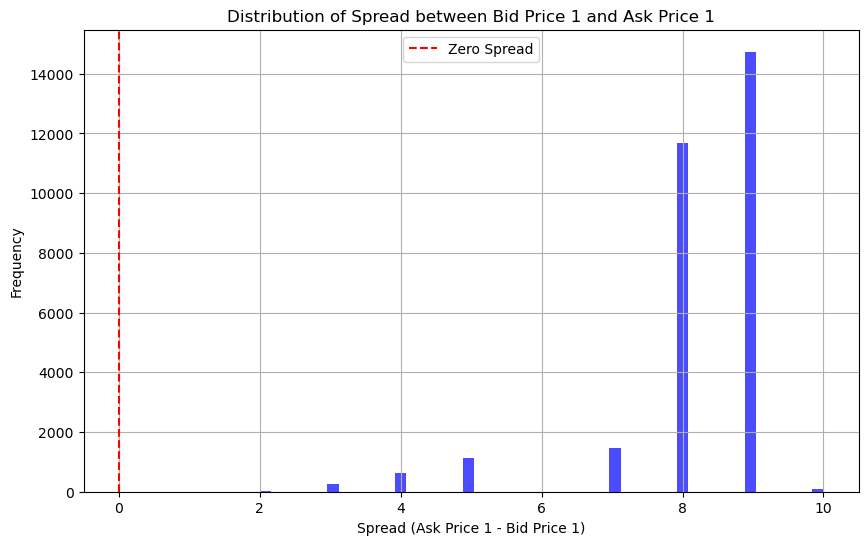

In [116]:
#Plot spread between bid_price_1 and ask_price_1 distribution
plt.figure(figsize=(10, 6))
prices["spread"] = prices["ask_price_1"] - prices["bid_price_1"]
plt.hist(prices["spread"], bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Spread between Bid Price 1 and Ask Price 1")
plt.xlabel("Spread (Ask Price 1 - Bid Price 1)")
plt.ylabel("Frequency")
plt.grid(True)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Spread')
plt.legend()

In [110]:
prices["spread"]

0          2.0
1          1.0
2          3.0
3         16.0
4          1.0
          ... 
449995     1.0
449996    10.0
449997     1.0
449998     9.0
449999     1.0
Name: spread, Length: 450000, dtype: float64

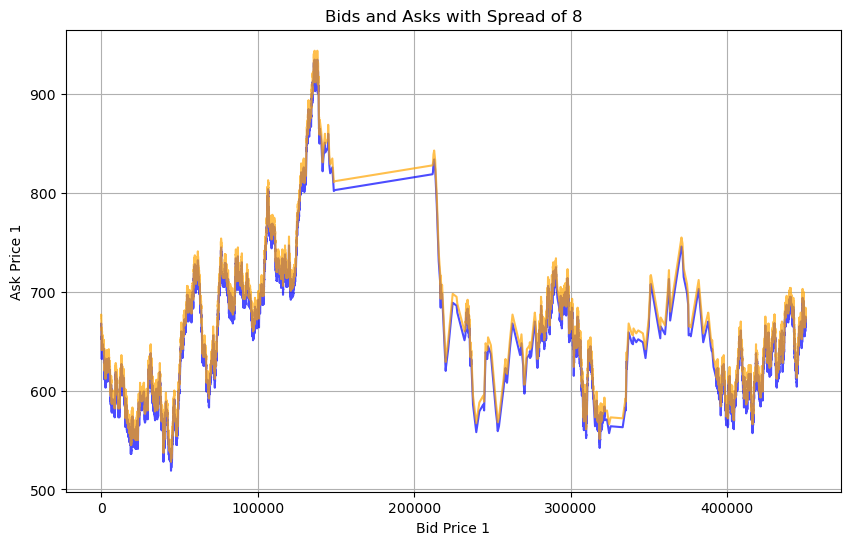

In [119]:
#Plot bids and asks over time only when the spread is 1.5
plt.figure(figsize=(10, 6))
short_spread = prices[prices["spread"] == 9]
plt.plot(short_spread["bid_price_1"],label = "Bid Price 1", color='blue', alpha=0.7)
plt.plot(short_spread["ask_price_1"], label="Ask Price 1", color='orange', alpha=0.7)
plt.title("Bids and Asks with Spread of 8")
plt.xlabel("Bid Price 1")
plt.ylabel("Ask Price 1")
plt.grid(True)

In [120]:
observations_1 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\observations_round_4_day_1.csv",sep =",")
observations_2 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\observations_round_4_day_2.csv",sep =",")   
observations_3 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\observations_round_4_day_3.csv",sep =",")
observations_1["day"] = 1
observations_2["day"] = 2
observations_3["day"] = 0
observations = pd.concat([observations_1, observations_2, observations_3], axis=0)
observations.sort_values(by=["day","timestamp"],inplace=True)
observations.reset_index(drop=True, inplace=True)

In [121]:
observations

,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,day
0,0,671.0,672.5,2.1,10.0,-3.0,199.000000,55.00,0
1,100,672.0,673.5,2.1,10.0,-3.0,199.064089,55.00,0
2,200,668.5,670.0,2.1,10.0,-3.0,198.783168,55.01,0
3,300,668.5,670.0,2.1,10.0,-3.0,198.545120,55.02,0
4,400,668.0,669.5,2.1,10.0,-3.0,198.455261,55.02,0
...,...,...,...,...,...,...,...,...,...
29995,999500,675.5,677.0,2.1,10.0,-3.0,198.132272,54.99,2
29996,999600,670.5,672.0,2.1,10.0,-3.0,197.899374,54.99,2
29997,999700,670.0,672.0,2.1,10.0,-3.0,197.900115,54.99,2
29998,999800,668.5,670.0,2.1,10.0,-3.0,198.192381,55.00,2


In [122]:
observations["sunlightIndex"]

0        55.00
1        55.00
2        55.01
3        55.02
4        55.02
         ...  
29995    54.99
29996    54.99
29997    54.99
29998    55.00
29999    55.00
Name: sunlightIndex, Length: 30000, dtype: float64

In [ ]:
#Plot bids of observations vs bids of prices
plt.figure(figsize=(10, 6))
plt.plot(observations["bid_price_1"], label="Observation Bid Price 1", color='blue', alpha=0.7)
plt.plot(prices["bid_price_1"], label="Price Bid Price 1", color='orange', alpha=0.7)

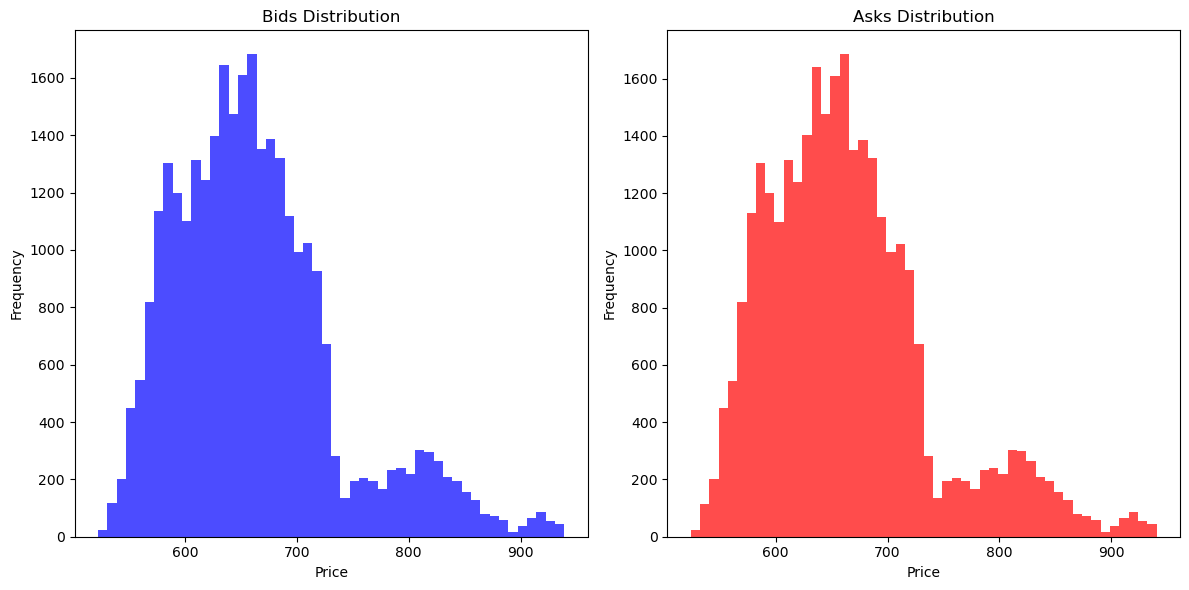

In [ ]:
#Plot bids and asks distributions side by side:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(observations['bidPrice'], bins=50, alpha=0.7, color='blue', label='Bids')
plt.title('Bids Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(observations['askPrice'], bins=50, alpha=0.7, color='red', label='Asks')
plt.title('Asks Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [137]:
observations

,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,day
0,0,671.0,672.5,2.1,10.0,-3.0,199.000000,55.00,0
1,100,672.0,673.5,2.1,10.0,-3.0,199.064089,55.00,0
2,200,668.5,670.0,2.1,10.0,-3.0,198.783168,55.01,0
3,300,668.5,670.0,2.1,10.0,-3.0,198.545120,55.02,0
4,400,668.0,669.5,2.1,10.0,-3.0,198.455261,55.02,0
...,...,...,...,...,...,...,...,...,...
29995,999500,675.5,677.0,2.1,10.0,-3.0,198.132272,54.99,2
29996,999600,670.5,672.0,2.1,10.0,-3.0,197.899374,54.99,2
29997,999700,670.0,672.0,2.1,10.0,-3.0,197.900115,54.99,2
29998,999800,668.5,670.0,2.1,10.0,-3.0,198.192381,55.00,2


Coefficients: [-0.0612462   0.14233246 -1.45858172 -1.47483229  1.33068985 -0.36351738]
Intercept: 5.787939456936101
R-squared: 0.9887630657650066


C:\Users\Usuario1\AppData\Local\Temp\ipykernel_29512\214162761.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  training = training.fillna(method='bfill')


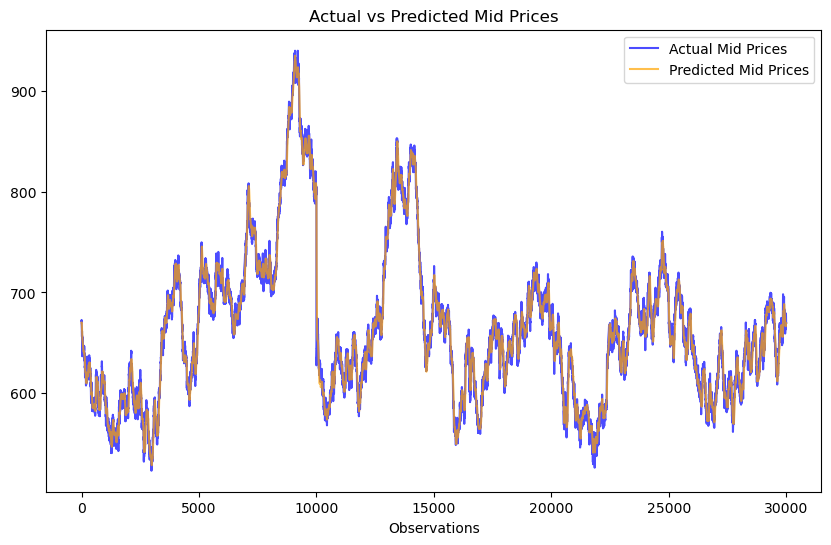

In [172]:
# First, calculate the exponential moving average
def calculate_ema(prices, span=100):
    """Calculate exponential moving average"""
    return prices.ewm(span=span, adjust=False).mean()

# Add EMA features to your training data
training = observations.copy()
training = training[training["day"] < 3]  # only day 0 and 1

# Calculate mid price correctly (average of bid and ask)
training['mid_price'] = (training["askPrice"] + training["bidPrice"]) / 2

# Calculate EMAs of different lengths
training['ema_short'] = calculate_ema(training['mid_price'], span=50)
training['ema_medium'] = calculate_ema(training['mid_price'], span=200)

# Fill any NaN values that might appear at the start
training = training.fillna(method='bfill')

# Create feature matrix including EMAs
y = training['mid_price'].values
x = np.column_stack([
    training["sunlightIndex"].values, 
    training["sugarPrice"].values, 
    training["exportTariff"],
    training["importTariff"],
    training["ema_short"],
    training["ema_medium"],
    # You can also add EMA differences as a momentum indicator
])

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(x, y))

# Predicting mid prices based on all features
predicted_mids = model.predict(x)

# Plotting the predicted mids against the actual mids
plt.figure(figsize=(10, 6))
plt.plot(training['mid_price'], label="Actual Mid Prices", color='blue', alpha=0.7)
plt.plot(predicted_mids, label="Predicted Mid Prices", color='orange', alpha=0.7)
plt.title("Actual vs Predicted Mid Prices")
plt.xlabel("Observations")
plt.legend()
plt.show()

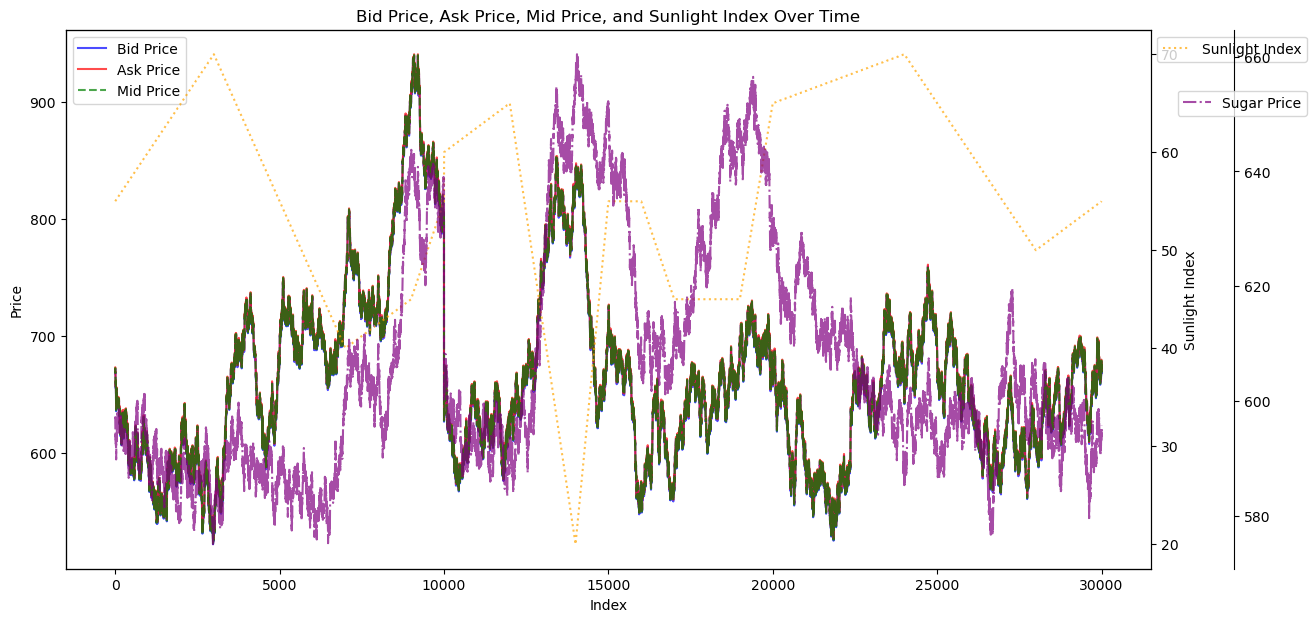

In [123]:
# Plot bidPrice and askPrice over time and their mid:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Primary y-axis for bidPrice, askPrice, and midPrice
ax1.plot(observations['bidPrice'], label='Bid Price', color='blue', alpha=0.7)
ax1.plot(observations['askPrice'], label='Ask Price', color='red', alpha=0.7)
ax1.plot((observations['bidPrice'] + observations['askPrice']) / 2, label='Mid Price', color='green', linestyle='--', alpha=0.7)
ax1.set_xlabel('Index')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')

# Secondary y-axis for sunlightIndex
ax2 = ax1.twinx()
ax2.plot(observations['sunlightIndex'], label='Sunlight Index', color='orange', linestyle=':', alpha=0.7)
ax2.set_ylabel('Sunlight Index')
ax2.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Third y-axis for sugarPrice
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.plot(observations['sugarPrice']*3, label='Sugar Price', color='purple', linestyle='-.', alpha=0.7)
ax3.legend(loc='upper right', bbox_to_anchor=(1.15, 0.9))

plt.title('Bid Price, Ask Price, Mid Price, and Sunlight Index Over Time')
plt.show()

In [161]:

observations

,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,day,midPrice
0,0,671.0,672.5,2.1,10.0,-3.0,199.000000,55.00,0,0.75
1,100,672.0,673.5,2.1,10.0,-3.0,199.064089,55.00,0,0.75
2,200,668.5,670.0,2.1,10.0,-3.0,198.783168,55.01,0,0.75
3,300,668.5,670.0,2.1,10.0,-3.0,198.545120,55.02,0,0.75
4,400,668.0,669.5,2.1,10.0,-3.0,198.455261,55.02,0,0.75
...,...,...,...,...,...,...,...,...,...,...
29995,999500,675.5,677.0,2.1,10.0,-3.0,198.132272,54.99,2,0.75
29996,999600,670.5,672.0,2.1,10.0,-3.0,197.899374,54.99,2,0.75
29997,999700,670.0,672.0,2.1,10.0,-3.0,197.900115,54.99,2,1.00
29998,999800,668.5,670.0,2.1,10.0,-3.0,198.192381,55.00,2,0.75


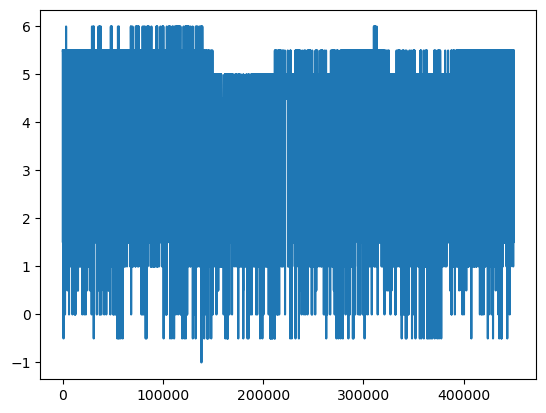

In [168]:
observations["midPrice"] = (observations["askPrice"]+ observations["bidPrice"])/2
plt.plot(prices.index,observations["askPrice"].values-prices["bid_price_1"].values)

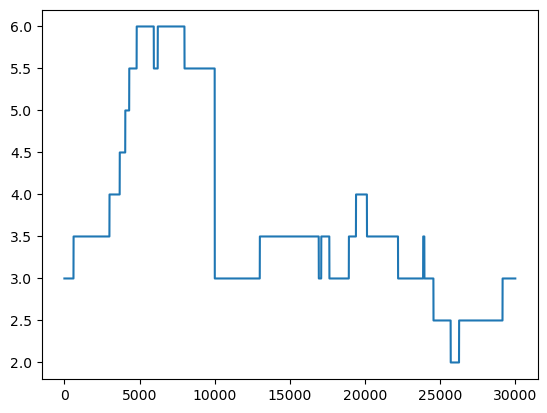

In [78]:
plt.plot(-df["importTariff"])

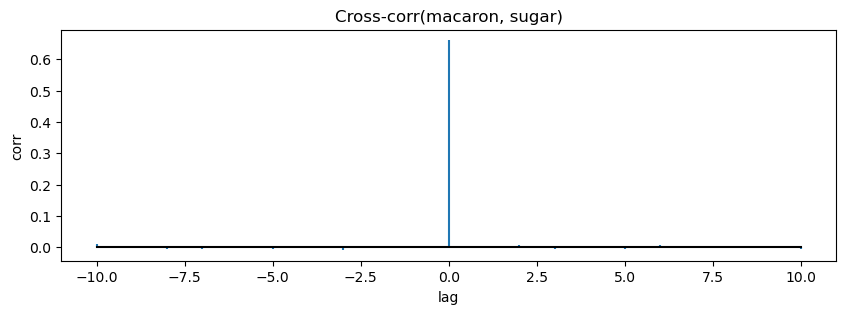

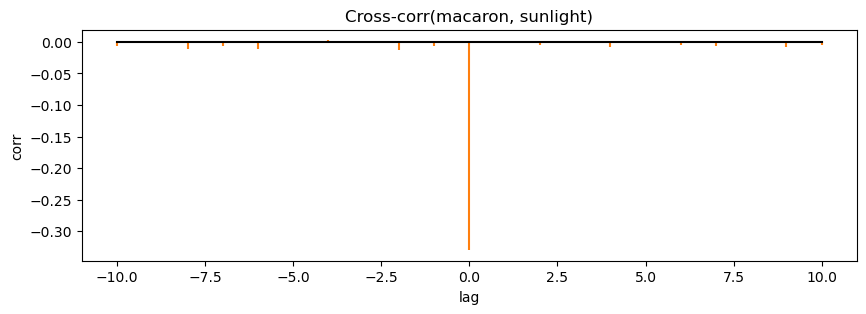

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = observations.copy()
df['midPrice'] = 0.5*(df['bidPrice'] + df['askPrice'])

df['mac_ret']   = np.log(df['midPrice']).diff()
df['sugar_ret'] = np.log(df['sugarPrice']).diff()

df['sun_diff']  = df['sunlightIndex'].diff()

df = df.dropna() 
max_lag = 10
lags    = np.arange(-max_lag, max_lag+1)

cc_sugar = [
    df['mac_ret'].corr(df['sugar_ret'].shift(l)) 
    for l in lags
]
cc_sun = [
    df['mac_ret'].corr(df['sun_diff'].shift(l)) 
    for l in lags
]

# plot them
plt.figure(figsize=(10,3))
plt.stem(lags, cc_sugar, basefmt='k-', linefmt='C0-', markerfmt=' ')
plt.title("Cross‐corr(macaron, sugar)"); plt.xlabel("lag"); plt.ylabel("corr")
plt.show()

plt.figure(figsize=(10,3))
plt.stem(lags, cc_sun, basefmt='k-', linefmt='C1-', markerfmt=' ')
plt.title("Cross‐corr(macaron, sunlight)"); plt.xlabel("lag"); plt.ylabel("corr")
plt.show()


Final PnL: 1.5963
Approx Sharpe: 0.21
Win rate: 47.12%


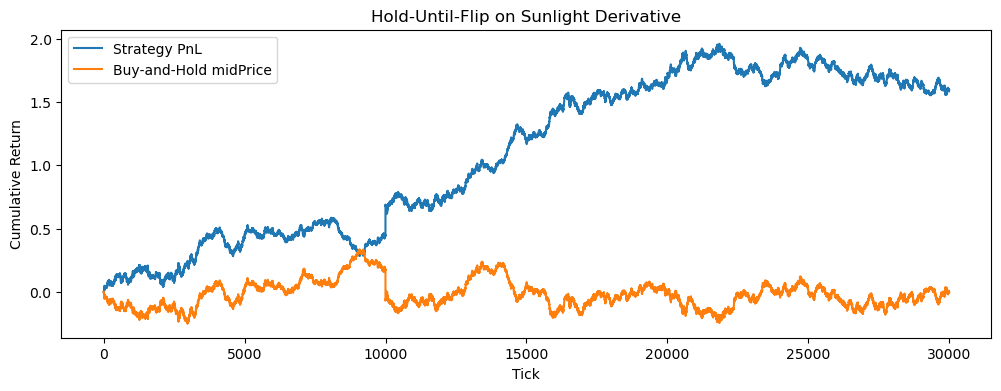

Number of position flips (trades): 11


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0) LOAD & PREPARE
# --------------------------------------------------------------------
# assume `observations` has ['bidPrice','askPrice','sunlightIndex'] on a simple index
df = observations.copy()

# macaron mid‐price & return
df['midPrice'] = 0.5*(df['bidPrice'] + df['askPrice'])
df['mac_ret']  = np.log(df['midPrice']).diff()

# sunlight derivative
df['sun_deriv'] = df['sunlightIndex'].diff()

# drop the NaNs created by diff()
df = df.dropna().reset_index(drop=True)


# 1) BUILD A “HOLD UNTIL FLIP” POSITION
# --------------------------------------------------------------------
# raw sign of derivative: +1, 0, or -1
df['sign_raw'] = -np.sign(df['sun_deriv'])

# whenever sign_raw == 0, keep the previous non‐zero sign (ffill);
# if the very first few are 0, we treat them as 0 (flat).
df['position'] = df['sign_raw'].replace(0, np.nan).ffill().fillna(0)

# shift by 1 to avoid look‐ahead (we only act on the previous tick’s signal)
df['position'] = df['position'].shift(1).fillna(0)


# 2) COMPUTE STRATEGY RETURNS
# --------------------------------------------------------------------
df['strat_ret'] = df['position'] * df['mac_ret']


# 3) PERFORMANCE METRICS
# --------------------------------------------------------------------
# cumulative PnL
df['cum_pnl'] = df['strat_ret'].cumsum()

# Sharpe (annualized proxy; adjust freq to your tick rate)
sharpe = df['strat_ret'].mean() / df['strat_ret'].std() * np.sqrt(252)

# simple win‑rate
win_rate = (df['strat_ret'] > 0).mean()

print(f"Final PnL: {df['cum_pnl'].iloc[-1]:.4f}")
print(f"Approx Sharpe: {sharpe:.2f}")
print(f"Win rate: {win_rate:.2%}")


# 4) PLOTTING
# --------------------------------------------------------------------
plt.figure(figsize=(12,4))
plt.plot(df['cum_pnl'], label='Strategy PnL')
plt.plot(df['mac_ret'].cumsum(), label='Buy‐and‐Hold midPrice')
plt.legend()
plt.title("Hold‑Until‑Flip on Sunlight Derivative")
plt.xlabel("Tick")
plt.ylabel("Cumulative Return")
plt.show()


# 5) OPTIONAL DIAGNOSTICS: how many trades?
num_trades = (df['position'].diff().abs() > 0).sum()
print(f"Number of position flips (trades): {num_trades}")
